# GRIP:The Sparks Foundation
### Data Science and Business Analytics Internship
### TASK 1- Prediction Using Supervised Machine Learning
### Author:Gaurav Dobhal


 In this task, we need to predict the percentage of a student based on the number of hours studied.This is a simple linear regression task having 2 variables

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warning
import warnings as wg
wg.filterwarnings('ignore')

In [4]:
#reading data
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [49]:
#dimensions
data.shape

(25, 2)

In [85]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [86]:
#check for missing or null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Visualizing data

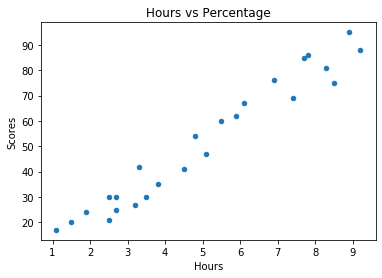

In [43]:
data.plot(kind="scatter",x="Hours",y="Scores");
plt.title("Hours vs Percentage")
plt.show()

In [44]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [46]:
data.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


## Data preparation

### First we have an independent variable 'hours' based on which we need to predict the value of variable 'Score' which is the target variable.

In [36]:
X=data.iloc[:,:1].values
Y=data.iloc[:,1:].values

In [37]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [38]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [39]:
#splitting data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=1)


# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

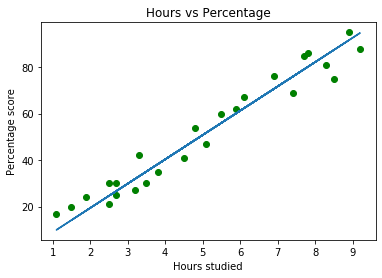

In [84]:
m=model.coef_
c= model.intercept_
line=m*X+c
plt.scatter(X,Y,color="green")
plt.plot(X,line)
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.title("Hours vs Percentage")
plt.show

In [71]:
print(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [61]:
Y_pred=model.predict(X_test)

In [72]:
Y_test

array([[17],
       [42],
       [24],
       [75],
       [54]], dtype=int64)

In [73]:
Y_pred

array([[ 9.97026179],
       [32.98470004],
       [18.33914843],
       [87.38246316],
       [48.67636248]])

In [96]:
actual_predicted=pd.DataFrame({'Target':[Y_test],'Predicted':[Y_pred]})

In [97]:
actual_predicted

,Target,Predicted
0,"[[17], [42], [24], [75], [54]]","[[9.97026179138372], [32.9847000372513], [18.3..."


#### What is predicted score if student studies for 9.25 hours/day?

In [89]:
hours=9.25
own_pred=model.predict([[hours]])
print("If a person studies for",hours,"hours,then the predicted score is",own_pred[0],"%")

If a person studies for 9.25 hours,then the predicted score is [95.22829438] %


## Model Evaluation

In [101]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error is",metrics.mean_absolute_error(Y_test,Y_pred))
print("R squared score is ",r2_score(Y_test,Y_pred))

Mean Absolute Error is 7.882398086270432
R squared score is  0.8421031525243527
